## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Fast ai packages for text models

In [2]:
from fastai import *
from fastai.text import *
from fastai.imports import *

In [3]:
train = pd.read_excel( 'Data_Train.xlsx')
test = pd.read_excel( 'Data_Test.xlsx')
sub = pd.read_excel( 'Sample_submission.xlsx')

In [4]:
train.shape, test.shape, sub.shape

((7628, 2), (2748, 1), (2748, 1))

In [6]:
train.head()

,STORY,SECTION
0,"But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that Yes Bank took it for granted that fees on structured loan deals will be paid and accounted for upfront on its books. As borrowers turned defaulters, the fees tied to these loan deals fell off the cracks. Gill has now vowed to shift to a safer accounting practice of amortizing fee income rather than booking these upfront.\n\n\nGill’s move to mend past ways means that there will be no nasty surprises in the future. This is good news considering that investors love a c...",3
1,"How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",0
2,"Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, Malaysian ringgit 0.12%, Indonesian rupiah 0.11%, Taiwan dollar 0.06%. However, Japanese yen was up 0.32%.\n\n\nThe dollar index, which measures the US currency’s strength against major currencies, was trading at 97.26, down 0.14% from its previous close of 97.395.",3
3,"If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users. Proceed to Answer either through writing or voice command.\n\n\nIf you want to ask any question, click on “Ask A Question"". Few question prefixes are already inserted to help you with your questions. After submitting your question, the app will send the questions to your neighbours and will let you know how many neighbours\n\n\nhave been asked the question. Click Done. You can click on the bell icon on the homepage of the app to follow answers to your questions.",1
4,"In global markets, gold prices edged up today as disappointing Chinese factory activity data brought back concerns about the health of the global economy, denting risk appetite. Spot gold rose 0.4% to $1,285 per ounce. European equity markets nudged down today, following weaker Asian stock markets.",3


In [7]:
test.head()

,STORY
0,"2019 will see gadgets like gaming smartphones and wearable medical devices lifting the user experience to a whole new level\n\n\nmint-india-wire consumer technologyconsumer technology trends in New Yeartech gadgetsFoldable phonesgaming smartphoneswearable medical devicestechnology\n\n\nNew Delhi: Gadgets have become an integral part of our lives with most of us relying on some form of factor to communicate, commute, work, be informed or entertained. Year 2019 will see some gadgets lifting the user experience to a whole new level. Here’s what we can expect to see:\n\n\nSmartphones with fold..."
1,It has also unleashed a wave of changes in the MCU that will make sure its future is a lot different than its past\n\n\nKevin Feige had signalled diversity and more representation in the post-phase 3 MCU and Endgame does a lot to showcase the initiative
2,"It can be confusing to pick the right smartphone for yourself, so we have segregated the top smartphones under Rs 20,000 according to their strengths.\n\n\nThe best smartphones under ₹20,000 categorised according to performance, camera, design and battery life\n\n\nmint-india-wire phones under Rs 20000Poco F1Realme U1Redmi Note 6 Prorealme 2 proHonor PlayNokia 7.1Nova 3iAsus Zenfone Max Pro M1\n\n\nGone are the days when you had to shell out big buck for buying smartphones with premium features. Technology has become more accessible recently and the biggest example of that lies in the sub-..."
3,"The mobile application is integrated with a dashboard to confirm and register the pre-registered cases, to enable online interface between the beneficiary and the panel lawyer through video conferencing and telephone facility.\n\n\nPrasad said that a pilot project in this regard had proved useful and more than 50,000 people have already availed this service. Till January, it resulted in enabling legal advice to 49,192 beneficiaries that include 36,526 (Women), 7049 (SC) and 13970 (ST) in 11 states including Uttar Pradesh, Bihar and all North-Eastern states and the State of Jammu and Kashmi..."
4,"We have rounded up some of the gadgets that showed up in 2018 and left an indelible mark on, consumers, experts and the tech industry\n\n\nYoungsters playing PUBG Mobile on their smartphone for hours, elderly switching off the lights using voice or a family watching their favourite movie in 4K HDR on Netflix are some of the habits which were shaped by the gadgets around them. We have rounded up some of the gadgets that showed up in 2018 and left an indelible mark on, consumers, experts and the tech industry .\n\n\nThe Echo Plus 2 takes the whole IoT experience up by a few notches with feat..."


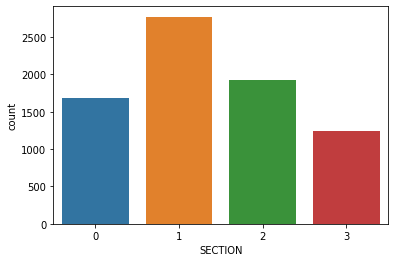

In [8]:
sns.countplot(x='SECTION', data=train)

### Function to create seed to get reproducible results 

In [9]:
def random_seed(seed_value):
    import random 
    random.seed(seed_value)  
    import numpy as np
    np.random.seed(seed_value)  
    import torch
    torch.manual_seed(seed_value)  
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  
        torch.backends.cudnn.deterministic = True   
        torch.backends.cudnn.benchmark = False

In [10]:
from sklearn.metrics import accuracy_score 
y_pred_totcb = []
from sklearn.model_selection import KFold, RepeatedKFold
fold = KFold(n_splits=15, shuffle=True, random_state=0)
i=1

for train_index, test_index in fold.split(train):
    
    train_df = train.iloc[train_index]
    valid_df = train.iloc[test_index]

    random_seed(10)
    
    data_lm = TextLMDataBunch.from_df(Path(path), train_df, valid_df, test, text_cols=[0], bs=32)
    data_clas = TextClasDataBunch.from_df(Path(path), train_df, valid_df, test, text_cols=[0], label_cols=1, bs=32)
    
    learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.4, model_dir='/tmp/model/')
    learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))
    learn.unfreeze()
    learn.fit_one_cycle(9, 1e-3, moms=(0.8,0.7))
    learn.save_encoder('model_enc')
    
    learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.4, model_dir='/tmp/model/')
    learn.load_encoder('model_enc')
    learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))
    learn.freeze_to(-2)
    learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
    learn.freeze_to(-3)
    learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
    learn.unfreeze()
    learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
   
    log_preds, test_labels = learn.get_preds(ds_type=DatasetType.Test, ordered=True)
    preds = np.argmax(log_preds, 1)
    y_pred_totcb.append(preds)
    print(f'fold {i} completed')
    i = i+1

epoch,train_loss,valid_loss,accuracy,time
0,3.884861,3.618055,0.341282,00:33


epoch,train_loss,valid_loss,accuracy,time
0,3.383326,3.510152,0.353401,00:40
1,3.297758,3.433312,0.364023,00:40
2,3.114028,3.382402,0.373136,00:39
3,2.867497,3.353268,0.377482,00:40
4,2.580076,3.357384,0.382314,00:40
5,2.304793,3.380360,0.384887,00:40
6,2.100055,3.420664,0.385018,00:40
7,1.930216,3.454225,0.384191,00:40
8,1.888747,3.466512,0.384073,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.155208,0.100051,0.974460,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.137248,0.090150,0.968566,00:18


epoch,train_loss,valid_loss,accuracy,time


## Submission

In [11]:
df = pd.DataFrame()
for i in range(15):
    col_name = 'SECTION_' + str(i)
    df[col_name] =  y_pred_totcb[i] 

In [12]:
df.shape

(2748, 15)

In [13]:
df.tail()

,SECTION_0,SECTION_1,SECTION_2,SECTION_3,SECTION_4,SECTION_5,SECTION_6,SECTION_7,SECTION_8,SECTION_9,SECTION_10,SECTION_11,SECTION_12,SECTION_13,SECTION_14
2743,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2744,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2745,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2746,0,0,3,3,0,0,0,0,0,0,0,0,3,0,0
2747,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
sub = pd.DataFrame()
sub['SECTION'] = df.mode(axis=1)[0]
sub.tail()

,SECTION
2743,1
2744,1
2745,1
2746,0
2747,1


In [15]:
sub['SECTION'].value_counts()

1    1183
2     826
0     417
3     322
Name: SECTION, dtype: int64

In [ ]:
sub.to_csv(index=False)